In [1]:
'''You have been provided with a two dimension dataset - clustering dataset 2D set 1 (xls)
    a) Are there any outliers? If there are, what did you do about them? 
    b) Establish the optimal number of clusters for this dataset using two different clustering algorithms'''

'You have been provided with a two dimension dataset - clustering dataset 2D set 1 (xls)\n    a) Are there any outliers? If there are, what did you do about them? \n    b) Establish the optimal number of clusters for this dataset using two different clustering algorithms'

In [2]:
import pandas as pd
# Loading the dataset
clusterdata = pd.read_csv('clustereddata.csv')
clusterdata

Dataset  feature 1  feature 2
0         NaN     453320     606542
1         NaN     520651     594591
2         NaN     516664     660290
3         NaN     570023     570741
4         NaN     524035     518443
...       ...        ...        ...
4995      NaN     361134     191237
4996      NaN     393818     302840
4997      NaN     351482     334662
4998      NaN     341057     341338
4999      NaN     374464     284441

[5000 rows x 3 columns]

In [3]:
# Check for missing attributes
clusterdata.isna()

Dataset  feature 1  feature 2
0        True      False      False
1        True      False      False
2        True      False      False
3        True      False      False
4        True      False      False
...       ...        ...        ...
4995     True      False      False
4996     True      False      False
4997     True      False      False
4998     True      False      False
4999     True      False      False

[5000 rows x 3 columns]

In [4]:
# Since dataset column is empty, we drop it. 
clustered_data = clusterdata.drop(columns=['Dataset'])
clustered_data

feature 1  feature 2
0        453320     606542
1        520651     594591
2        516664     660290
3        570023     570741
4        524035     518443
...         ...        ...
4995     361134     191237
4996     393818     302840
4997     351482     334662
4998     341057     341338
4999     374464     284441

[5000 rows x 2 columns]

In [5]:
clustered_data.shape

(5000, 2)

In [6]:
clustered_data.describe()

feature 1      feature 2
count    5000.000000    5000.000000
mean   496564.695000  485799.739600
std    196628.464271  198939.143541
min     32710.000000   70003.000000
25%    329967.500000  317271.000000
50%    502124.500000  460873.500000
75%    654700.000000  649026.250000
max    942327.000000  947322.000000

In [7]:
clustered_data.dtypes

feature 1    int64
feature 2    int64
dtype: object

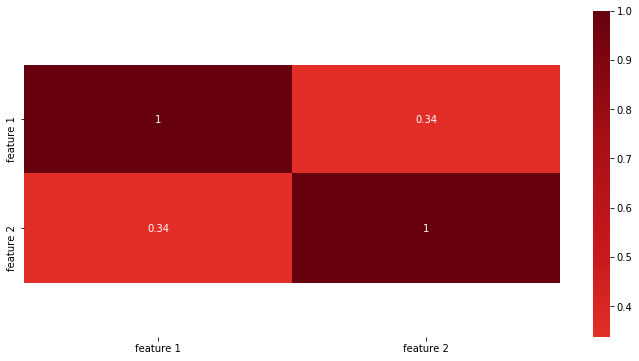

In [8]:
# Attributes correlation
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(12,6))

sns.heatmap(clustered_data.corr(),center=0,cmap='Reds',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

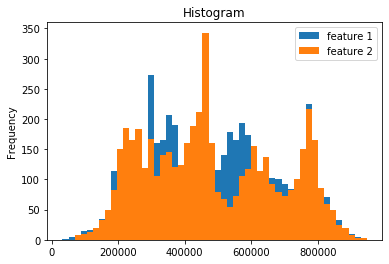

In [9]:
# To determine which method to use to find outliers, we plot histogram of the variable and 
# look at its distribution
import seaborn as sns
clustered_data.plot.hist(bins=50, title='Histogram')

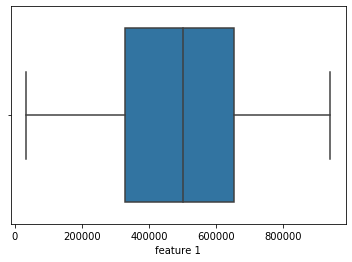

In [10]:
# Using boxplot method to get the outliers...
sns.boxplot(clustered_data['feature 1'])

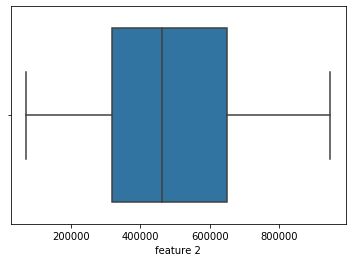

In [11]:
# Using boxplot method to get the outliers...
sns.boxplot(clustered_data['feature 2'])

[0 0 0 ... 0 0 0]


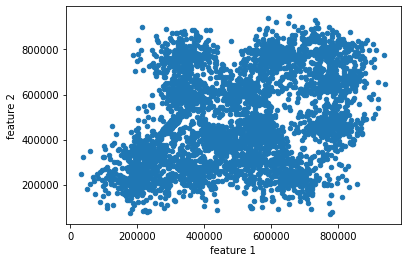

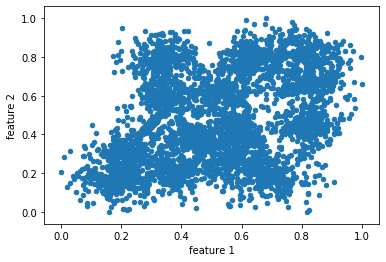

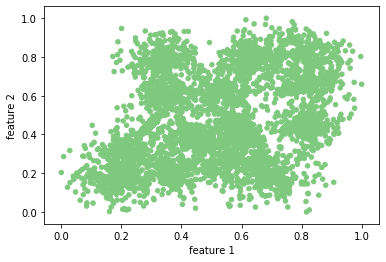

In [12]:
# To strengthen the outliers argument, use DBSCAN method to find the outliers...
'''
using DBSCAN that uses clustering... Calculate distance between points and look for points which are far away
from others...
'''
# Comparing feature1,feature2 and Calcium (Before normalization)
feature1_feature2 = clustered_data[['feature 1', 'feature 2']]
feature1_feature2.plot.scatter(x='feature 1', y='feature 2')

'''Since the variable will have different scales, they should be normalized..'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature1_feature2 = scaler.fit_transform(feature1_feature2)
feature1_feature2 = pd.DataFrame(feature1_feature2, columns=['feature 1','feature 2'])
feature1_feature2.plot.scatter(x='feature 1', y='feature 2')

''' DBSCAN Assigns points to clusters and returns the labels. If it returns -1, it means
the value is an outlier'''
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps=0.2,metric='euclidean',min_samples=5,n_jobs=-1)
clusters = outlier_detection.fit_predict(feature1_feature2)
print(clusters)

# Plotting the graph with outliers
from matplotlib import cm
cmap = cm.get_cmap('Accent')
feature1_feature2.plot.scatter(
    x='feature 1',
    y='feature 2',
    c=clusters,
    cmap = cmap,
    colorbar = False
)

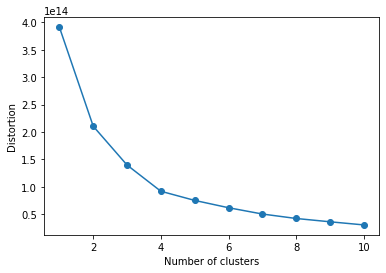

In [13]:
# Finding the optimal value of K to use in k-means (Elbow method)
from sklearn.cluster import KMeans
distortions = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    
    km.fit(clustered_data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

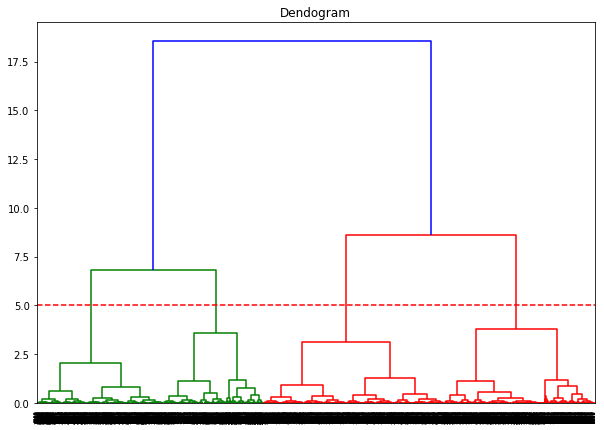

In [14]:
# hierarchical clustering..
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

scaled_data = normalize(clustered_data)
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.axhline(y=5,color='r',linestyle='--')
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit_predict(scaled_data)
plt.show()

In [27]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0).fit(clustered_data)
clustering.labels_

clustering



SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=0)

Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=4,
      threshold=0.5)


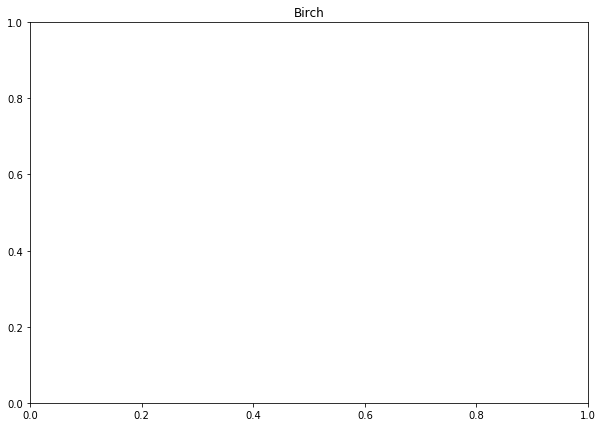

In [21]:
from sklearn.cluster import Birch
plt.figure(figsize=(10,7))
plt.title('Birch')
bclust=Birch(branching_factor=100, threshold=.5,n_clusters=4,
        compute_labels=True,
        copy=True).fit(clustered_data)
print(bclust)
labels = bclust.predict(clustered_data)
bclust.fit(clustered_data)
plt.show()